In [1]:
import os, sys
from libs import *

from data import ImageDataset
from models.models import PretextsCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

Global seed set to 23


In [2]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [3]:
model = torch.load(
    "../ckps/HAM/PretextsCA/best.ptl", map_location = "cuda", 
)

In [4]:
train_dataset = ImageDataset(
    data_dir = "../datasets/HAM/train/", 
)

features, attn_features = [], []
labels = []
for i in tqdm.tqdm_notebook(range(len(train_dataset))):
    image, label = train_dataset[i]

    feature, attn_feature = model(image.cuda().unsqueeze(0))[0]
    features.append(feature.squeeze(0).detach().cpu().numpy()), attn_features.append(attn_feature.squeeze(0).detach().cpu().numpy())
    labels.append(label)

features, attn_features = np.array(features), np.array(attn_features)
labels = np.array(labels)

  0%|          | 0/9017 [00:00<?, ?it/s]

In [5]:
embedder = TSNE(
    n_components = 2, n_iter = 1000, 
    random_state = 23, 
)
embedded_features, embedded_attn_features = embedder.fit_transform(features), embedder.fit_transform(attn_features)

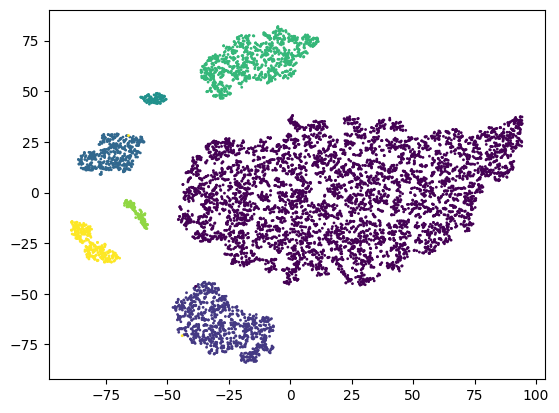

In [7]:
plt.scatter(
    *[embedded_features[:, i] for i in range(2)], 
    c = labels, 
    s = 1, 
)
plt.show()

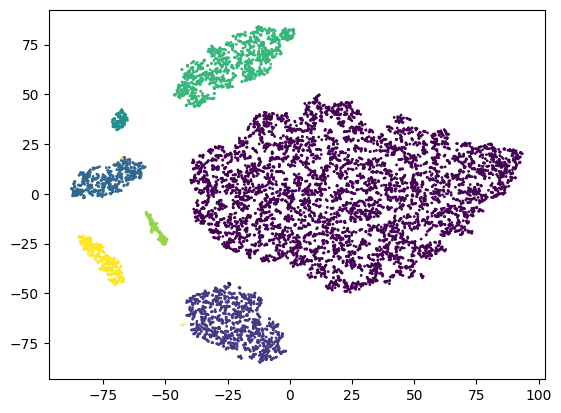

In [8]:
plt.scatter(
    *[embedded_attn_features[:, i] for i in range(2)], 
    c = labels, 
    s = 1, 
)
plt.show()

In [9]:
if not os.path.exists("../ckps/HAM/PretextsCA/attn_features"):
    os.makedirs("../ckps/HAM/PretextsCA/attn_features")
for c in range(7):
    attn_features_c = attn_features[np.where(labels == c)[0]]
    np.save("../ckps/HAM/PretextsCA/attn_features/attn_features_{}.npy".format(c), attn_features)